##  *Statistics coded:* Causes of death statistics

Prepared by  [**Katharina Koehler**](@kkatha) (EMOS).

Objective of this notebook is illustrating the "Statistics Explained" article [Causes of death statisitics](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).

### Configuration

Put all libraries/packages/modules/etc... that are necessary so that you can run this notebook.

In [1]:
#install.packages(c("ggplot2", "plotly", "tidyr", "repr", "dplyr", "devtools", "restatapi"))
install.packages("eurostat")

also installing the dependencies 'e1071', 'bibtex', 'units', 'classInt', 'countrycode', 'RefManageR', 'sf', 'sp'




  There is a binary version available but the source version is later:
            binary source needs_compilation
countrycode  1.1.3  1.2.0             FALSE

package 'e1071' successfully unpacked and MD5 sums checked
package 'bibtex' successfully unpacked and MD5 sums checked
package 'units' successfully unpacked and MD5 sums checked
package 'classInt' successfully unpacked and MD5 sums checked
package 'RefManageR' successfully unpacked and MD5 sums checked
package 'sf' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'eurostat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Katha\AppData\Local\Temp\RtmpsF2ZjW\downloaded_packages


installing the source package 'countrycode'



In [2]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(eurostat)
library(reshape2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'eurostat' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



### Loading relevant datasets for analyses/ graphics

Pulling data from Eurostat API "https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=hlth_cd_asdr2&lang=en" id/ code used in function argument "hlth_cd_asdr2" and "hlth_cd_asdr" to identify dataset
- "hlth_cd_asdr2": Causes of death - standardised death rate by residence, 2011-2017 needed
- "hlth_cd_asdr": Causes of death - standardised death rate per 100 000 inhabitants - annual data, 2006-2010 needed

#### First step:
Define variables for relevant countries to make filtering easier later
#### Second Step
Loading the complete dataset per bulk download via API -> Filtering the complete data set accordingly with R commands later

In [36]:
EU_27 <- c("EU27_2020", "AT","BE", "BG","HR","CY", "CZ","DK", "DE", "EE","FI","FR","EL","HU","IE",
           "IT","LV","LT","LU","MT","NL","PL","PT","RO","SK","SI","ES","SE")
countries <- c("EU27_2020", "AT","BE", "BG","HR","CY", "CZ","DK", "DE", "EE","FI","FR","EL","HU","IE",
               "IT","LV","LT","LU","MT","NL","PL","PT","RO","SK","SI","ES","SE","UK","IS","LI","NO","CH","RS","TR")

In [47]:
dataset <- get_eurostat(id="hlth_cd_asdr2")

Reading cache file C:\Users\Katha\AppData\Local\Temp\RtmpsF2ZjW/eurostat/hlth_cd_asdr2_date_codeY_TF.rds
Table  hlth_cd_asdr2  read from cache file:  C:\Users\Katha\AppData\Local\Temp\RtmpsF2ZjW/eurostat/hlth_cd_asdr2_date_codeY_TF.rds


unit,sex,age,icd10,geo,time,values
RT,F,TOTAL,A-R_V-Y,AT,2017-01-01,800.93
RT,F,TOTAL,A-R_V-Y,AT1,2017-01-01,839.44
RT,F,TOTAL,A-R_V-Y,AT11,2017-01-01,831.87
RT,F,TOTAL,A-R_V-Y,AT12,2017-01-01,844.03
RT,F,TOTAL,A-R_V-Y,AT13,2017-01-01,835.65
RT,F,TOTAL,A-R_V-Y,AT2,2017-01-01,785.24


In [51]:
dataset$time <- as.integer(substr(dataset$time,1,4))
head(dataset)

unit,sex,age,icd10,geo,time,values
RT,F,TOTAL,A-R_V-Y,AT,2017,800.93
RT,F,TOTAL,A-R_V-Y,AT1,2017,839.44
RT,F,TOTAL,A-R_V-Y,AT11,2017,831.87
RT,F,TOTAL,A-R_V-Y,AT12,2017,844.03
RT,F,TOTAL,A-R_V-Y,AT13,2017,835.65
RT,F,TOTAL,A-R_V-Y,AT2,2017,785.24


In [34]:
dataset_2 <- get_eurostat(id="hlth_cd_asdr")

Reading cache file C:\Users\Katha\AppData\Local\Temp\RtmpsF2ZjW/eurostat/hlth_cd_asdr_date_code_TF.rds
Table  hlth_cd_asdr  read from cache file:  C:\Users\Katha\AppData\Local\Temp\RtmpsF2ZjW/eurostat/hlth_cd_asdr_date_code_TF.rds


In [53]:
dataset_2 <- subset(dataset_2,dataset_2$time >= 2006)

In [55]:
dataset_2$time <- as.integer(substr(dataset_2$time,1,4))
head(dataset_2)

unit,sex,age,icd10,geo,time,values
RT,F,TOTAL,A-R_V-Y,AT,2010,820.2
RT,F,TOTAL,A-R_V-Y,BE,2010,845.7
RT,F,TOTAL,A-R_V-Y,BG,2010,1382.2
RT,F,TOTAL,A-R_V-Y,CH,2010,730.6
RT,F,TOTAL,A-R_V-Y,CY,2010,829.4
RT,F,TOTAL,A-R_V-Y,CZ,2010,1064.4


### Main findings

The code here will help reproducing the material presented in the section [Main findings](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).

#### Creation of table: causes of death - standarized death rate, 2017
##### First steps: Filter data accordingly:
- only keep relevant countries
- create one values variable with values from 2017 and from 2016 where 2017 not available
- Keep only causes of death relevant for table, summarize

In [56]:
datatbl1 <- subset(dataset, dataset$sex=="T" &
                     dataset$age =="TOTAL" & 
                    dataset$geo %in% countries & 
                     (dataset$time==2017 | dataset$time==2016))
head(datatbl1)

unit,sex,age,icd10,geo,time,values
RT,T,TOTAL,A-R_V-Y,AT,2017,959.95
RT,T,TOTAL,A-R_V-Y,BE,2017,963.19
RT,T,TOTAL,A-R_V-Y,BG,2017,1631.13
RT,T,TOTAL,A-R_V-Y,CH,2017,823.77
RT,T,TOTAL,A-R_V-Y,CY,2017,1071.36
RT,T,TOTAL,A-R_V-Y,CZ,2017,1239.97


In [57]:
datatbl1$values_n <- ifelse(datatbl1$time==2017,datatbl1$values,NA)
datatbl1[datatbl1$geo=="FR",]$values_n <- datatbl1[datatbl1$geo=="FR",]$values
datatbl1[datatbl1$geo=="EU27_2020",]$values_n <- datatbl1[datatbl1$geo=="EU27_2020",]$values
datatbl1 <- datatbl1[!is.na(datatbl1$values_n),]

In [60]:
causes <- c("I","I20-I25","C","C33_C34","C18-C21","J","G_H","V_Y85","	X60-X84_Y870","C50","C53","	C54_C55")
datatbl1 <- datatbl1[datatbl1$icd10 %in% causes,]
#table(datatbl1$values_n,datatbl1$icd10)
#datatbl1$icd10
datatbl11 <- datatbl1[,c(4,5,8)]
head(datatbl11)

icd10,geo,values_n
C,AT,236.23
C,BE,240.06
C,BG,232.81
C,CH,214.81
C,CY,211.84
C,CZ,275.80


##### Second steps: Table

### Developments between 2006 & 2016

The code here will help reproducing the material presented in the section [Developments between 2006 and 2010](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).

##### First steps: Merge two datasets to get data in the time interval 2006 - 2010, apply filters

In [118]:
# Merge:
dataset_3 <- rbind(dataset,dataset_2) 
str(dataset_3)

Classes 'tbl_df', 'tbl' and 'data.frame':	1198869 obs. of  7 variables:
 $ unit  : Factor w/ 1 level "RT": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex   : Factor w/ 3 levels "F","M","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ age   : Factor w/ 3 levels "TOTAL","Y_GE65",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ icd10 : Factor w/ 89 levels "A-R_V-Y","A15-A19_B90",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ geo   : Factor w/ 482 levels "AT","AT1","AT11",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ time  : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ values: num  801 839 832 844 836 ...


###### Graphic Males

In [123]:
##Graphic Males, 2006-2016, 100=2006
datagr1 <- subset(dataset_3, dataset_3$sex=="M" & dataset_3$age =="TOTAL" &
                     dataset_3$geo == "EU27_2020")
datagr1 <- subset(datagr1, datagr1$time >=2006)
#Keep only causes relevant for graphic
causes <- c("V_Y85","C","G_H","I20-I25","C33_C34")
datagr1 <- datagr1[datagr1$icd10 %in% causes,]
datagr1 <- droplevels(datagr1)
str(datagr1)

Classes 'tbl_df', 'tbl' and 'data.frame':	52 obs. of  7 variables:
 $ unit  : Factor w/ 1 level "RT": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex   : Factor w/ 1 level "M": 1 1 1 1 1 1 1 1 1 1 ...
 $ age   : Factor w/ 1 level "TOTAL": 1 1 1 1 1 1 1 1 1 1 ...
 $ icd10 : Factor w/ 5 levels "C","C33_C34",..: 1 2 3 4 5 1 2 3 4 5 ...
 $ geo   : Factor w/ 1 level "EU27_2020": 1 1 1 1 1 1 1 1 1 1 ...
 $ time  : int  2016 2016 2016 2016 2016 2015 2015 2015 2015 2015 ...
 $ values: num  343.96 83.59 44.96 162.46 9.67 ...


###### Second step: Standardize such that 2006 = 100

In [108]:
table(datagr1$icd10[datagr1$time==2006],datagr1$values[datagr1$time == 2006])

         
          16.3 36.5 226.9 387
  C          0    0     0   1
  C33_C34    0    0     0   0
  G_H        0    1     0   0
  I20-I25    0    0     1   0
  V_Y85      1    0     0   0

In [109]:
table(datagr1$icd10[datagr1$time==2009],datagr1$values[datagr1$time == 2009])

         
          13.5 37.6 94.7 201.2 372.9
  C          0    0    0     0     1
  C33_C34    0    0    1     0     0
  G_H        0    1    0     0     0
  I20-I25    0    0    0     1     0
  V_Y85      1    0    0     0     0

In [124]:
datagr1$values[datagr1$icd10=="C"] <- datagr1$values[datagr1$icd10=="C"] /3.87
datagr1$values[datagr1$icd10=="G_H"] <- datagr1$values[datagr1$icd10=="G_H"]/0.365
datagr1$values[datagr1$icd10=="I20-I25"] <- datagr1$values[datagr1$icd10=="I20-I25"]/2.269
datagr1$values[datagr1$icd10=="V_Y85"] <- datagr1$values[datagr1$icd10=="V_Y85"]/0.163
datagr1$values[datagr1$icd10=="C33_C34"] <- datagr1$values[datagr1$icd10=="C33_C34"]/0.947

##### Third step: Create graphic with ggplot2 package

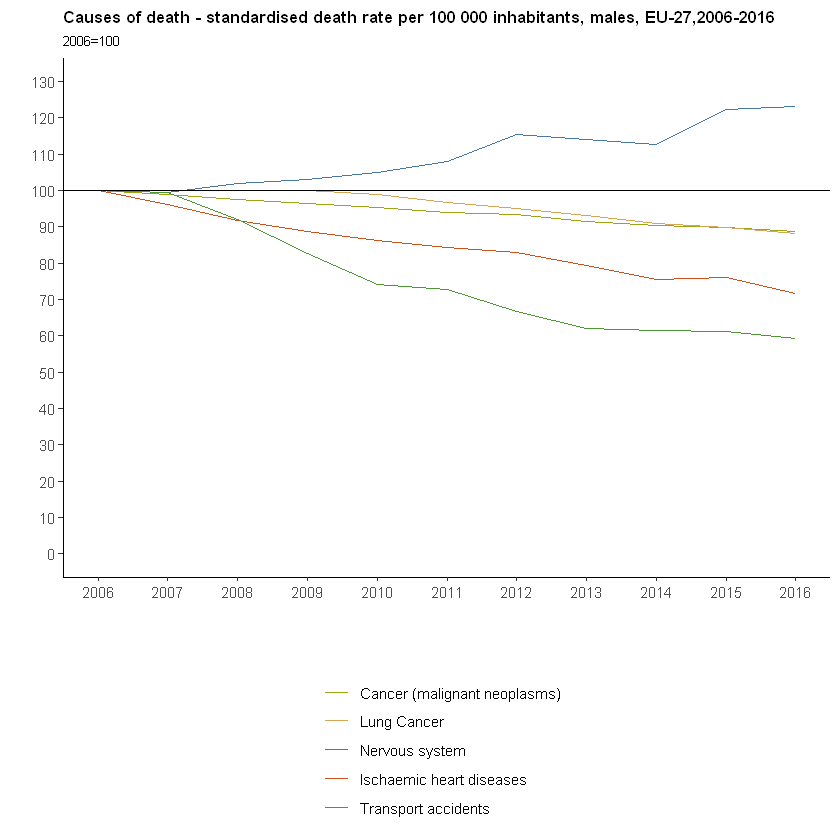

In [147]:
col_nerv <- rgb(83,140,196,maxColorValue=300)
col_lung <- rgb(252,195,100,maxColorValue=300)
col_canc <- rgb(184,195,25,maxColorValue=300)
col_heart <- rgb(240,96,29,maxColorValue=300)
col_acc <- rgb(91,179,61,maxColorValue=300)

figure1 <- ggplot(datagr1, aes(x=time,y=values, group=icd10)) +
    geom_line(aes(color=icd10)) + 
    geom_hline(yintercept=100,lty=1) +
    ggtitle("Causes of death - standardised death rate per 100 000 inhabitants, males, EU-27,2006-2016",subtitle="2006=100") +
    scale_y_continuous(limits = c(0, 130), breaks = seq(0, 130, by = 10)) +
    scale_x_continuous(limits = c(2006, 2016), breaks = seq(2006, 2016, by = 1)) +
    theme_classic()+
    theme(legend.position="bottom",legend.direction="vertical") +
    scale_color_manual(labels = c("Cancer (malignant neoplasms)", "Lung Cancer", "Nervous system","Ischaemic heart diseases",
                                 "Transport accidents"), 
    values = c(col_canc,col_lung,col_nerv,col_heart,col_acc), name = " ") +
    ylab(" ")+
    xlab(" ")

figure1 + theme(
  plot.title = element_text(size = 10, face = "bold"),
  plot.subtitle = element_text(size=8),
)

In [ ]:
ggplot(datagr1, aes(x=time,y=values, group=icd10)) +
    geom_line(aes(color=icd10)) +
    geom_line(y=100,lty=3) +
    ylim(c(0,130)) +
    theme_bw ()

### Causes of death by sex

The code here will help reproducing the material presented in the section [Causes of death by sex](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Causes_of_death_statistics).

##### First steps: Apply relevant filters

In [ ]:
data_fig3 <- subset(dataset, dataset$time==2016  & 
                      dataset$geo=="European Union - 27 countries (from 2020)"&
                    dataset$age=="Total"& dataset$icd10!="All causes of death (A00-Y89) excluding S00-T98")
data_fig3 <- data_fig3[,-c(1,3,5,6)]
View(data_fig3)
head(data_fig3[order(data_fig30$values,decreasing = T),],20)
# Filtering out levels summarizing multiple diseases
data_fig3 <- subset(data_fig3,data_fig0$icd10!="Diseases of the circulatory system (I00-I99)" &
                      data_fig3$icd10!="Neoplasms" &
                      data_fig3$icd10!="Malignant neoplasms (C00-C97)" &
                      data_fig3$icd10!="Diseases of the respiratory system (J00-J99)" &
                      data_fig3$icd10!="Other heart diseases" &
                      data_fig3$icd10!="Other diseases of the circulatory system (remainder of I00-I99)")